In [3]:
import pickle

with open('/home/maria/LuckyMouse4/data/visp_significant_neuron_weights.pkl', 'rb') as f:
    data = pickle.load(f)


In [5]:
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ─── Load Dictionary of Weight Matrices ───────────────────────────────────────
with open('/home/maria/LuckyMouse4/data/visp_significant_neuron_weights.pkl', 'rb') as f:
    data = pickle.load(f)  # Dict: neuron_idx → (n_tasks, D) weight matrix

# ─── Stack All Weight Vectors into a Single Matrix ────────────────────────────
all_weights = []
neuron_ids = []

for neuron_id, matrix in data.items():
    all_weights.append(matrix)
    neuron_ids.extend([neuron_id] * len(matrix))

X = np.vstack(all_weights)            # Shape: (n_total_tasks, D)
neuron_ids = np.array(neuron_ids)    # Shape: (n_total_tasks,)

print(f"Total weight vectors: {X.shape[0]} (from {len(data)} neurons)")

Total weight vectors: 166200 (from 831 neurons)


In [8]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)

dim=pca.fit_transform(X)


 ...]

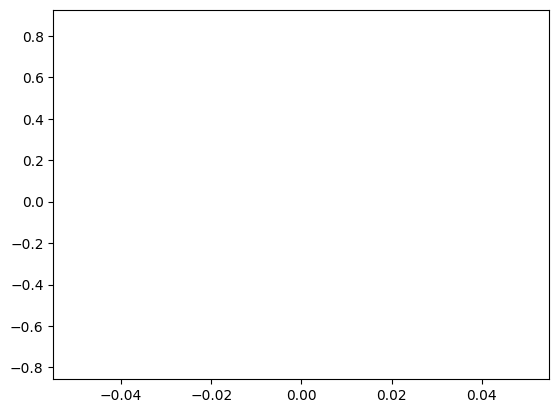

In [36]:
plt.plot(np.sort(dim.T))

In [37]:
dim.shape

(166200, 1)

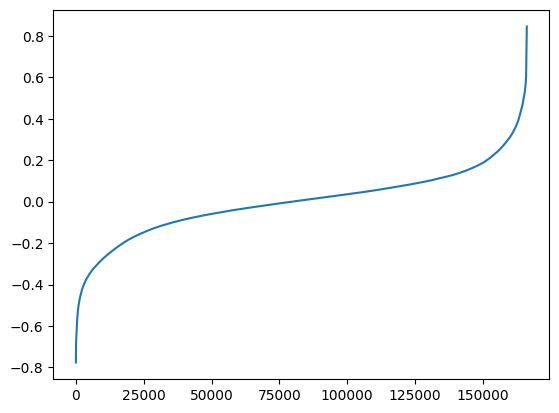

In [39]:
plt.plot(np.sort(dim.flatten()))

In [ ]:
c=pca.components_

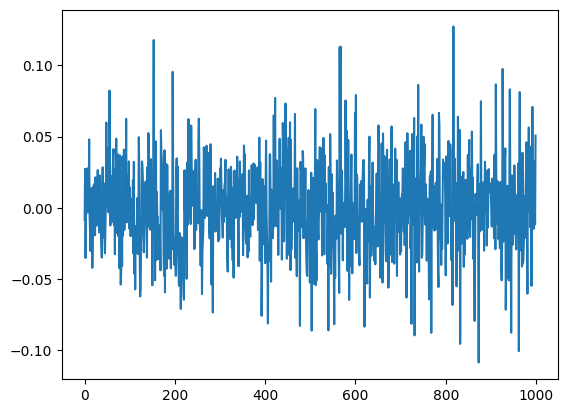

In [18]:
plt.plot(c.T)

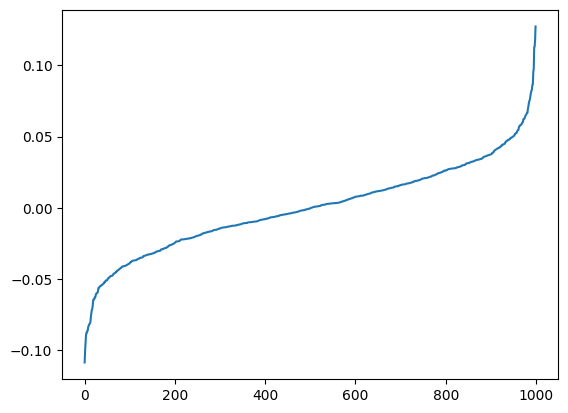

In [23]:
plt.plot(np.sort(c).T)


In [29]:
import json
import numpy as np
from pathlib import Path
import csv

def load_id2label(config_path=None, model_name='google/vit-base-patch16-224'):
    id2label = {i: str(i) for i in range(1000)}
    if config_path and Path(config_path).exists():
        with open(config_path, "r") as f:
            cfg = json.load(f)
        if "id2label" in cfg:
            return {int(k): v for k, v in cfg["id2label"].items()}
    try:
        from transformers import AutoConfig
        cfg = AutoConfig.from_pretrained(model_name, local_files_only=True)
        if getattr(cfg, "id2label", None):
            return {int(k): v for k, v in cfg.id2label.items()}
    except Exception:
        pass
    return id2label

def extreme_labels(pc_loadings, id2label, k=20):
    pc = np.asarray(pc_loadings).reshape(-1)
    assert pc.shape[0] == 1000, f"Expected 1000-dim loadings, got {pc.shape[0]}"
    order = np.argsort(pc)
    neg_idx = order[:k]
    pos_idx = order[-k:][::-1]
    neg = [(int(i), id2label.get(int(i), str(i)), float(pc[i])) for i in neg_idx]
    pos = [(int(i), id2label.get(int(i), str(i)), float(pc[i])) for i in pos_idx]
    return neg, pos

def print_extremes(neg, pos):
    print("Most negative (← PC1):")
    for i, lab, val in neg:
        print(f"{i:4d}  {val: .6f}  {lab}")
    print("\nMost positive (→ PC1):")
    for i, lab, val in pos:
        print(f"{i:4d}  {val: .6f}  {lab}")

def save_extremes_csv(neg, pos, path="pc1_extremes.csv"):
    rows = [("side","index","label","loading")]
    rows += [("negative", i, lab, val) for i, lab, val in neg]
    rows += [("positive", i, lab, val) for i, lab, val in pos]
    with open(path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(rows)
    return path

# ---- Usage ----
pc1 = c  # make sure this is the 1000-d PC1 *loadings*, not scores per neuron
id2label = load_id2label(config_path="config.json")
neg, pos = extreme_labels(pc1, id2label, k=25)
print_extremes(neg, pos)
# save_extremes_csv(neg, pos)  # optional


Most negative (← PC1):
 873  -0.108484  triumphal arch
 962  -0.100529  meat loaf, meatloaf
 832  -0.095473  stupa, tope
 731  -0.089444  plunger, plumber's helper
 768  -0.087699  rugby ball
 945  -0.087588  bell pepper
 503  -0.086140  cocktail shaker
 540  -0.085966  drilling platform, offshore rig
 620  -0.083367  laptop, laptop computer
 477  -0.082857  carpenter's kit, tool kit
 553  -0.081657  file, file cabinet, filing cabinet
 724  -0.081353  pirate, pirate ship
 406  -0.081115  altar
 864  -0.079382  tow truck, tow car, wrecker
 392  -0.075731  rock beauty, Holocanthus tricolor
 284  -0.073490  Siamese cat, Siamese
 933  -0.071428  cheeseburger
 213  -0.070963  Irish setter, red setter
 815  -0.068167  spider web, spider's web
 586  -0.064592  half track
 220  -0.064466  Sussex spaniel
 763  -0.064257  revolver, six-gun, six-shooter
 713  -0.062975  photocopier
 632  -0.062940  loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
 123  -0.062177  spiny lobst

In [30]:
pos

[(817, 'sports car, sport car', 0.12716390451203416),
 (153, 'Maltese dog, Maltese terrier, Maltese', 0.11767596420308157),
 (567, 'frying pan, frypan, skillet', 0.11301807292587329),
 (565, 'freight car', 0.1126507077971593),
 (926, 'hot pot, hotpot', 0.09739656456688434),
 (195, 'Boston bull, Boston terrier', 0.09534089788215012),
 (911, 'wool, woolen, woollen', 0.08657471481739651),
 (739, "potter's wheel", 0.086204647383733),
 (942, 'butternut squash', 0.08308992023180031),
 (55, 'green snake, grass snake', 0.08219613590565551),
 (964, 'potpie', 0.08117085414482754),
 (601, 'hoopskirt, crinoline', 0.07910902498887148),
 (422, 'barbell', 0.07703078829310588),
 (578, 'gown', 0.07530253297637794),
 (878, 'typewriter keyboard', 0.07470337768470238),
 (445, 'bikini, two-piece', 0.07313137750846585),
 (992, 'agaric', 0.07076899743442928),
 (511, 'convertible', 0.06924294204256044),
 (785, 'seat belt, seatbelt', 0.06660411078414144),
 (599, 'honeycomb', 0.06658154017330739),
 (466, 'bulle

In [31]:
neg

[(873, 'triumphal arch', -0.1084836711290597),
 (962, 'meat loaf, meatloaf', -0.10052860050023948),
 (832, 'stupa, tope', -0.09547319974478334),
 (731, "plunger, plumber's helper", -0.08944380797902367),
 (768, 'rugby ball', -0.08769943361493723),
 (945, 'bell pepper', -0.0875884217405015),
 (503, 'cocktail shaker', -0.0861398338566243),
 (540, 'drilling platform, offshore rig', -0.08596579448413663),
 (620, 'laptop, laptop computer', -0.08336741105388021),
 (477, "carpenter's kit, tool kit", -0.08285749774705416),
 (553, 'file, file cabinet, filing cabinet', -0.08165714845744264),
 (724, 'pirate, pirate ship', -0.08135250126395002),
 (406, 'altar', -0.08111520641759867),
 (864, 'tow truck, tow car, wrecker', -0.07938157078730056),
 (392, 'rock beauty, Holocanthus tricolor', -0.07573063713986665),
 (284, 'Siamese cat, Siamese', -0.07349001508829266),
 (933, 'cheeseburger', -0.07142785772376015),
 (213, 'Irish setter, red setter', -0.07096318136822011),
 (815, "spider web, spider's web"

In [ ]:
import json
import numpy as np
from pathlib import Path
import csv

def load_id2label(config_path=None, model_name='google/vit-base-patch16-224'):
    id2label = {i: str(i) for i in range(1000)}
    if config_path and Path(config_path).exists():
        with open(config_path, "r") as f:
            cfg = json.load(f)
        if "id2label" in cfg:
            return {int(k): v for k, v in cfg["id2label"].items()}
    try:
        from transformers import AutoConfig
        cfg = AutoConfig.from_pretrained(model_name, local_files_only=True)
        if getattr(cfg, "id2label", None):
            return {int(k): v for k, v in cfg.id2label.items()}
    except Exception:
        pass
    return id2label

def extreme_labels(pc_loadings, id2label, k=20):
    pc = np.asarray(pc_loadings).reshape(-1)
    assert pc.shape[0] == 1000, f"Expected 1000-dim loadings, got {pc.shape[0]}"
    order = np.argsort(pc)
    neg_idx = order[:k]
    pos_idx = order[-k:][::-1]
    neg = [(int(i), id2label.get(int(i), str(i)), float(pc[i])) for i in neg_idx]
    pos = [(int(i), id2label.get(int(i), str(i)), float(pc[i])) for i in pos_idx]
    return neg, pos

def print_extremes(neg, pos):
    print("Most negative (← PC1):")
    for i, lab, val in neg:
        print(f"{i:4d}  {val: .6f}  {lab}")
    print("\nMost positive (→ PC1):")
    for i, lab, val in pos:
        print(f"{i:4d}  {val: .6f}  {lab}")

def save_extremes_csv(neg, pos, path="pc1_extremes.csv"):
    rows = [("side","index","label","loading")]
    rows += [("negative", i, lab, val) for i, lab, val in neg]
    rows += [("positive", i, lab, val) for i, lab, val in pos]
    with open(path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(rows)
    return path

# ---- Usage ----
pc1 = c  # make sure this is the 1000-d PC1 *loadings*, not scores per neuron
id2label = load_id2label(config_path="config.json")
neg, pos = extreme_labels(pc1, id2label, k=25)
print_extremes(neg, pos)
# save_extremes_csv(neg, pos)  # optional


Most negative (← PC1):
 873  -0.108484  triumphal arch
 962  -0.100529  meat loaf, meatloaf
 832  -0.095473  stupa, tope
 731  -0.089444  plunger, plumber's helper
 768  -0.087699  rugby ball
 945  -0.087588  bell pepper
 503  -0.086140  cocktail shaker
 540  -0.085966  drilling platform, offshore rig
 620  -0.083367  laptop, laptop computer
 477  -0.082857  carpenter's kit, tool kit
 553  -0.081657  file, file cabinet, filing cabinet
 724  -0.081353  pirate, pirate ship
 406  -0.081115  altar
 864  -0.079382  tow truck, tow car, wrecker
 392  -0.075731  rock beauty, Holocanthus tricolor
 284  -0.073490  Siamese cat, Siamese
 933  -0.071428  cheeseburger
 213  -0.070963  Irish setter, red setter
 815  -0.068167  spider web, spider's web
 586  -0.064592  half track
 220  -0.064466  Sussex spaniel
 763  -0.064257  revolver, six-gun, six-shooter
 713  -0.062975  photocopier
 632  -0.062940  loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
 123  -0.062177  spiny lobst

In [40]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=1).fit(X)
scores   = pca.transform(X).ravel()          # UΣ
loadings = pca.components_[0].ravel()        # V

q = np.linspace(0,1,min(len(scores),len(loadings)),endpoint=False)[1:]
scores_q = np.quantile(scores, q)
loads_q  = np.quantile(loadings, q)
qq_corr  = np.corrcoef(scores_q, loads_q)[0,1]
print(f"QQ correlation: {qq_corr:.4f}")


QQ correlation: 0.9923
